# Smart Building Management or HVAC Control

In [2]:
# IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# IMPORTING MACHINE LEARNING LIBRARIES FOR EDA

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split

In [6]:
# IMPORTING MACHINE LEARNING CLASSIFIER LIBRARIES 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
# IMPORTING MACHINE LEARNING EVALUATION LIBRARIES

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [10]:
# JOB SAVEING 

In [11]:
import joblib

# Data Pre Processing

In [13]:
# DATA COLLECTION

In [14]:
data= pd.read_csv("D:\\paython\\Occupancy_Estimation.csv")
df= pd.DataFrame(data)

In [15]:
# PRINT FIRST 5 ROWS OF THE DATA

In [16]:
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,22/12/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,22/12/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,22/12/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,22/12/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,22/12/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11/01/2018,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,11/01/2018,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,11/01/2018,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,11/01/2018,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [17]:
# PRINT ALL INFORMATION OF THE DATA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [19]:
# PRINT DESCRIPTION  OF THE DATA

In [20]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [21]:
# DATA PRE PROCESSING
# 1) FIND NULL VALUES IN THE DATA

In [22]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [23]:
# 2) FIND ANY DUPLICATE DATA IN THE DATA SET

In [24]:
df.duplicated().sum()

0

In [25]:
# 3) FIND NUMERICAL COLUMNS AND STORE IN A VARIABLE

In [26]:
num_columns=df.select_dtypes(include=['int64','float64'])
num_columns

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [27]:
# 4) FIND THE OUTLIERS 
# DRAW THE BOX PLOT TO CHECK WHETHER THERE ARE ANY OUTLIERS

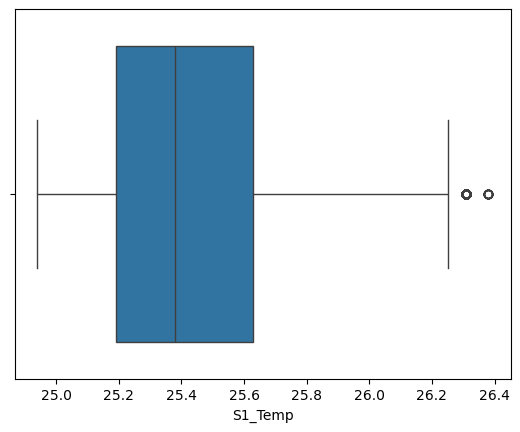

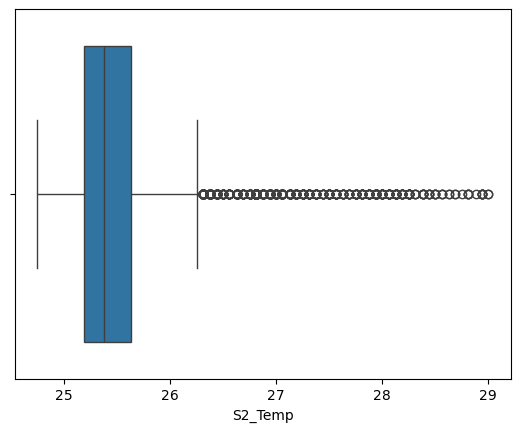

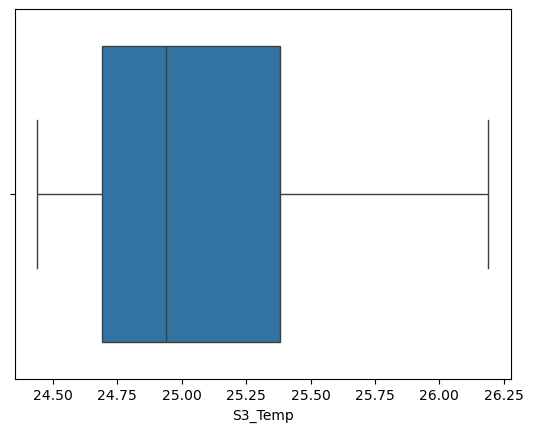

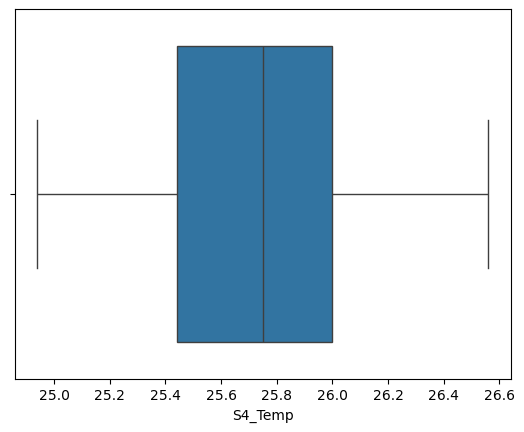

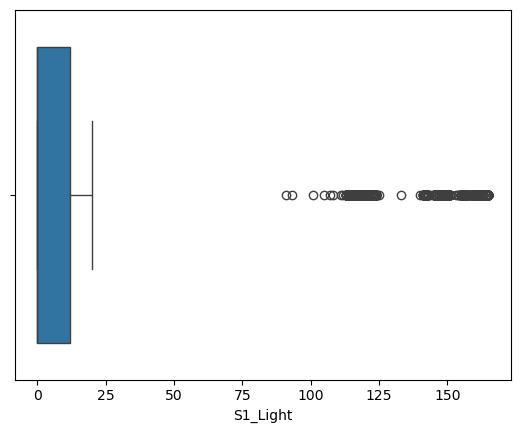

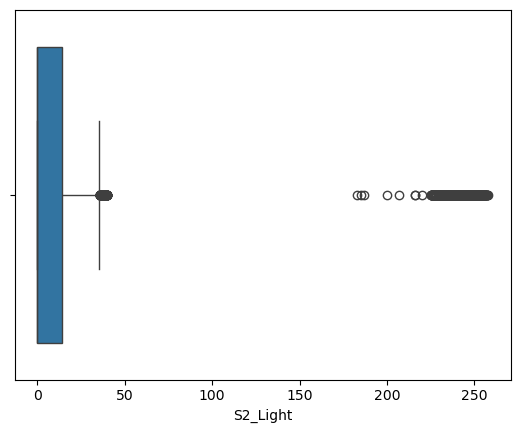

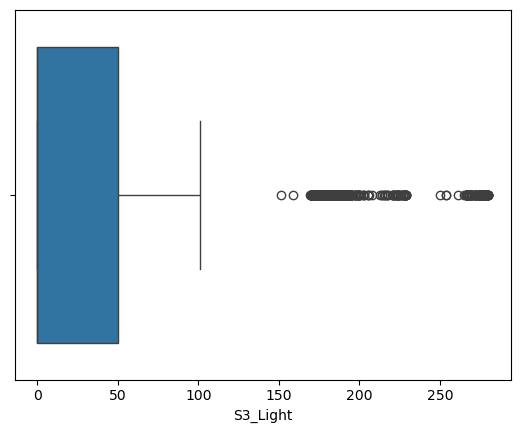

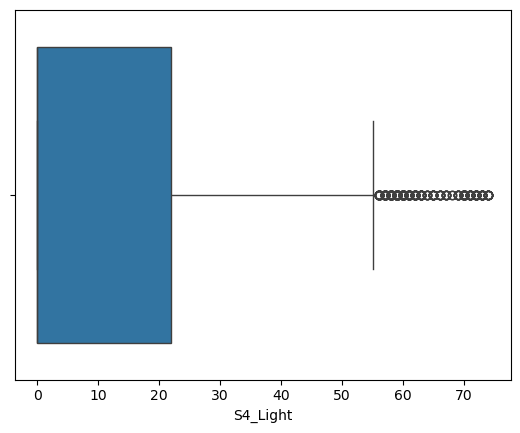

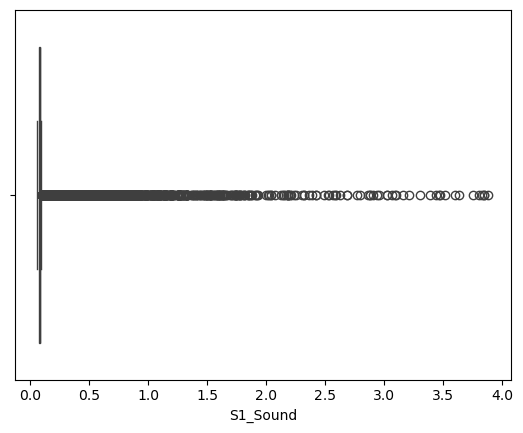

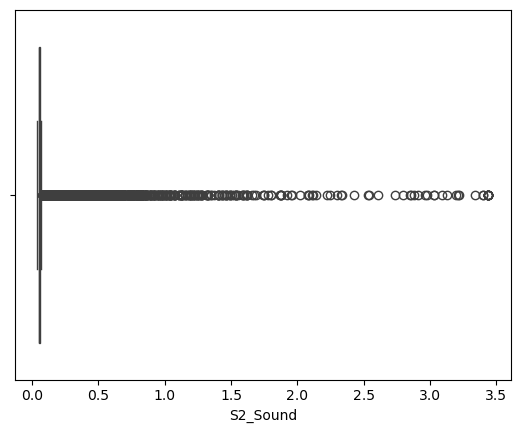

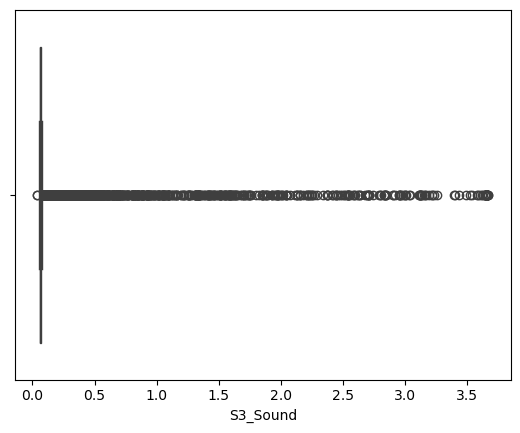

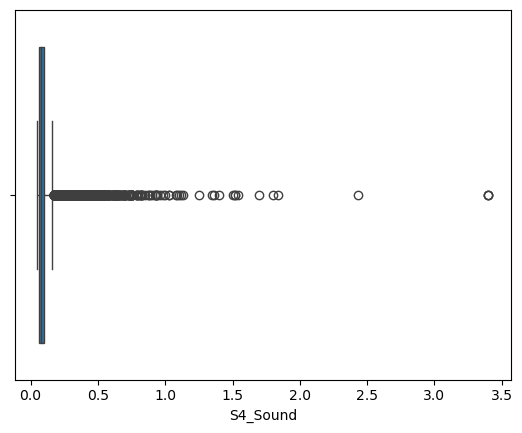

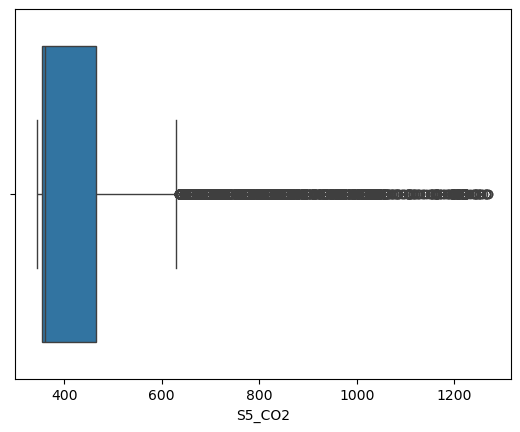

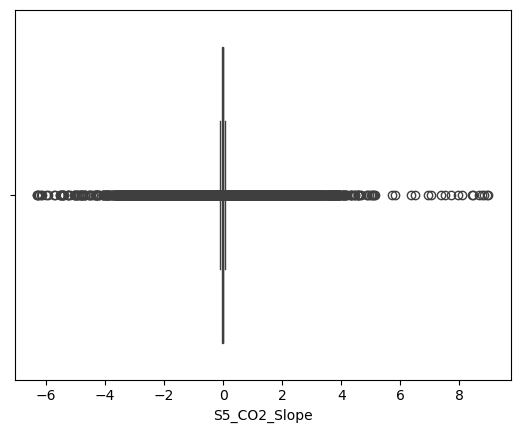

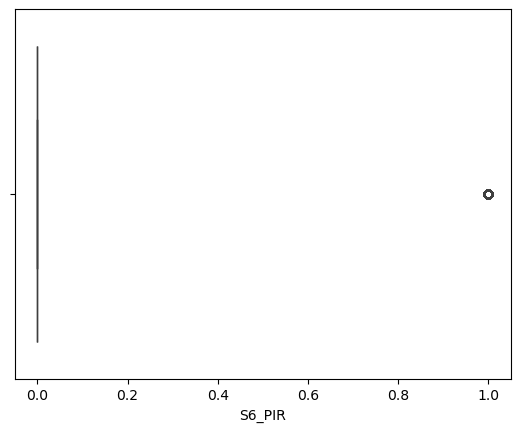

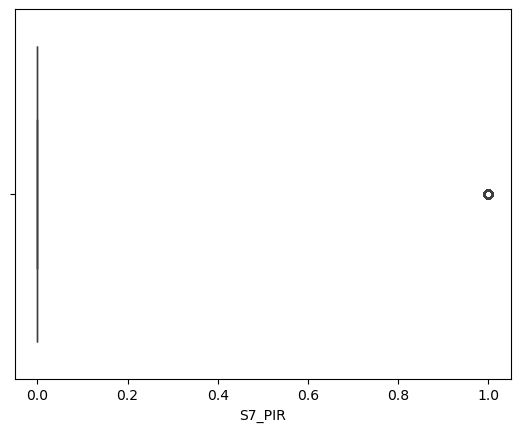

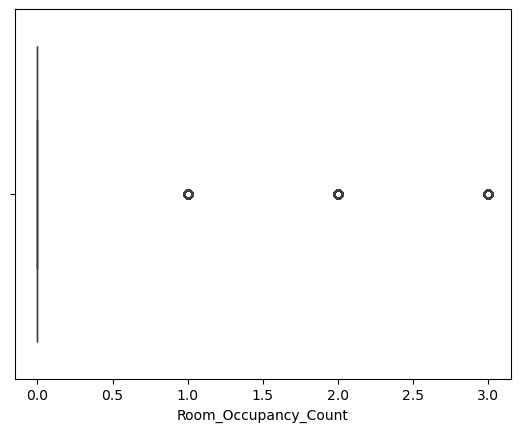

In [28]:
for i in num_columns.columns:
    sns.boxplot(data=num_columns,x=i)
    plt.show()

In [29]:
df.shape

(10129, 19)

In [30]:
df_for_outlier= df.select_dtypes(include=['int64','float64'])
df_for_outlier=df_for_outlier.drop('Room_Occupancy_Count',axis=1)

In [31]:
# 5) MANAGING OUTLIERS - USING 'FUNCTION

In [32]:
def outliers(df):
    for col in df_for_outlier.columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower =Q1-(1.5*IQR)
        upper=Q3 + (1.5*IQR)
        df[col]=df[col].apply(lambda x:lower if x<lower else upper if x> upper else x)
    return df

In [33]:
# FUNCTION CALLING

In [34]:
df_outlier= outliers(df)

In [35]:
df_outlier.shape

(10129, 19)

In [36]:
# DRAW BOX PLOT TO CHECK OUTLIERS, AFTER MANAGING OUTLIERS 

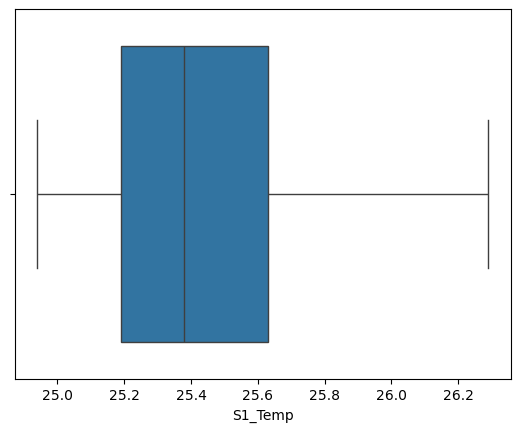

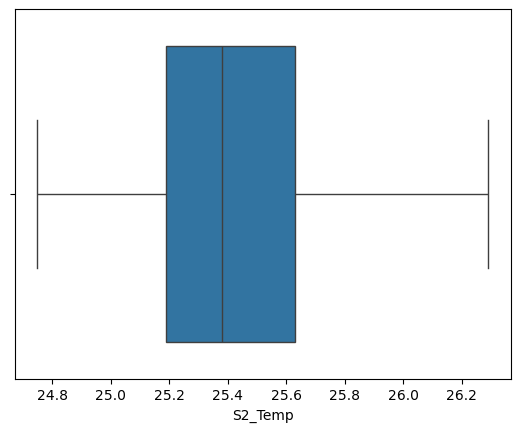

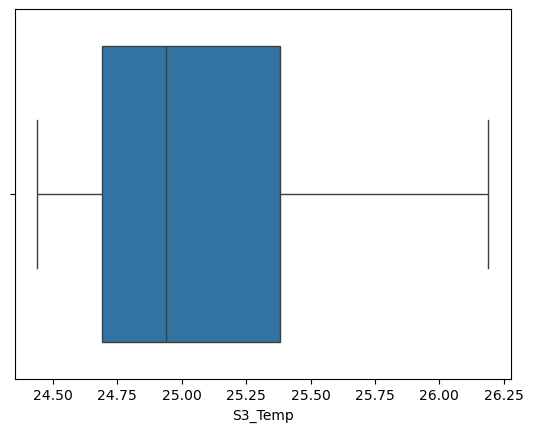

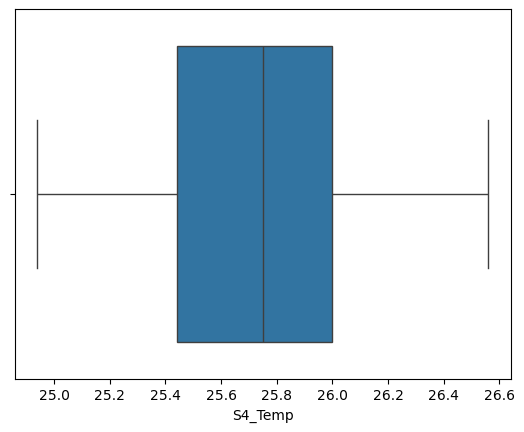

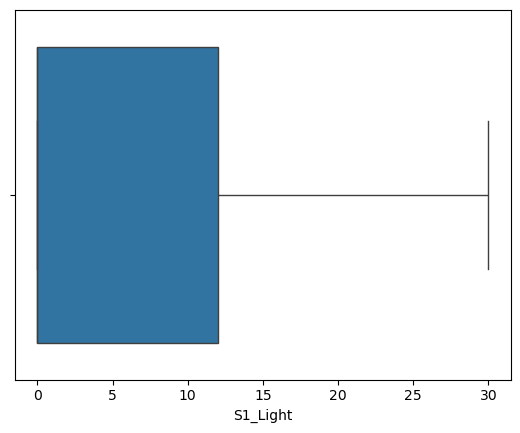

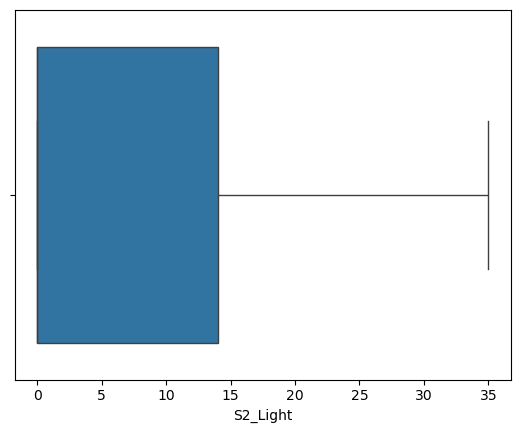

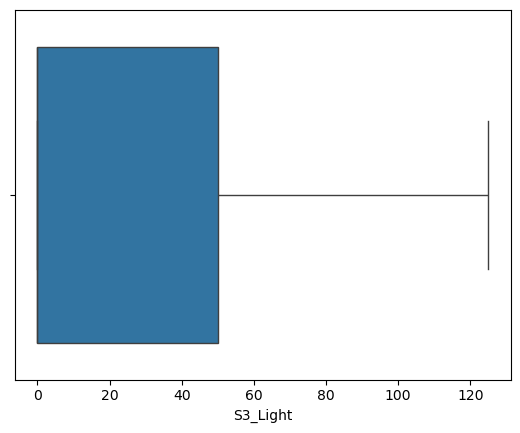

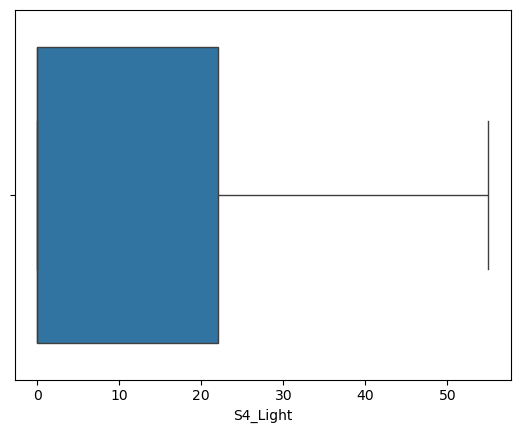

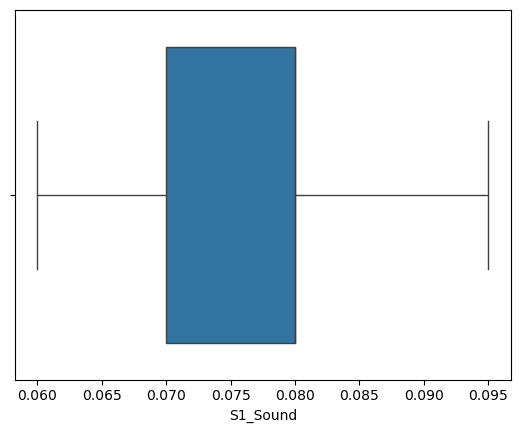

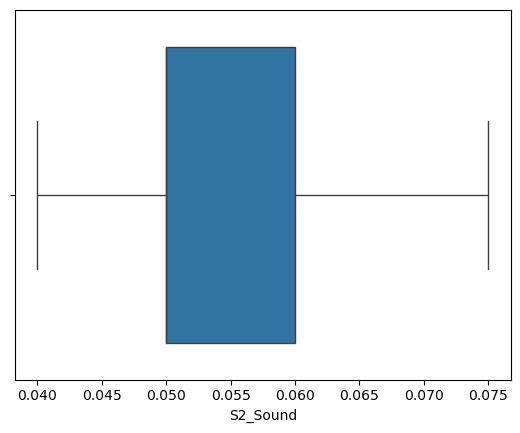

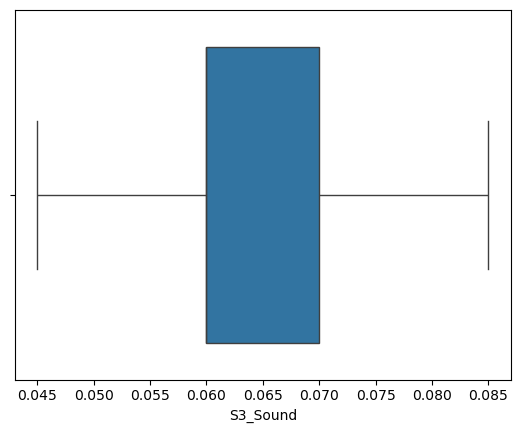

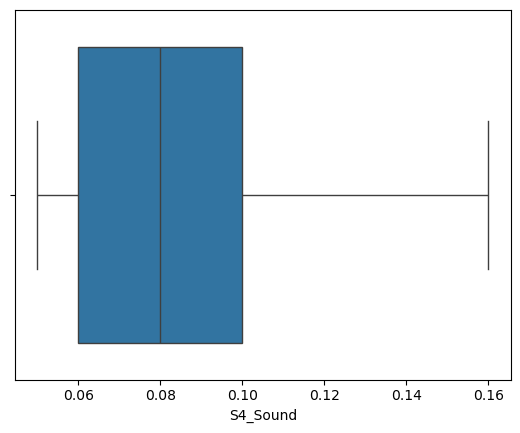

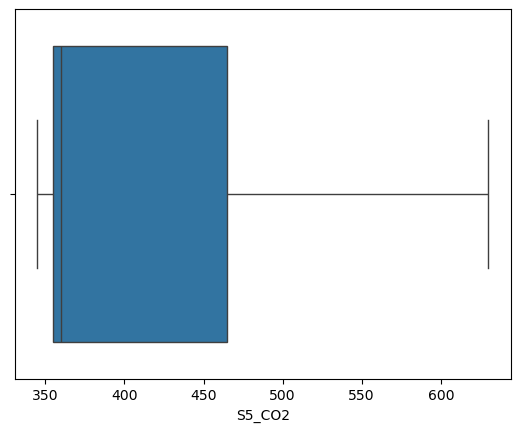

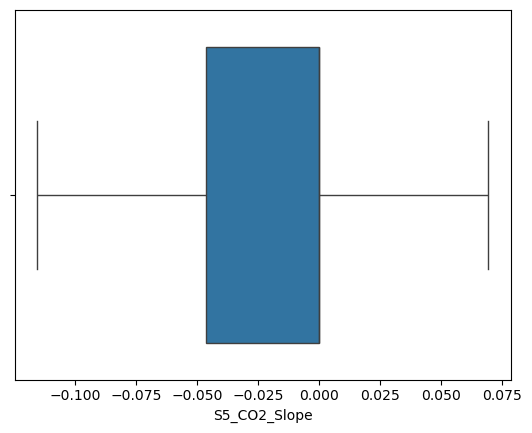

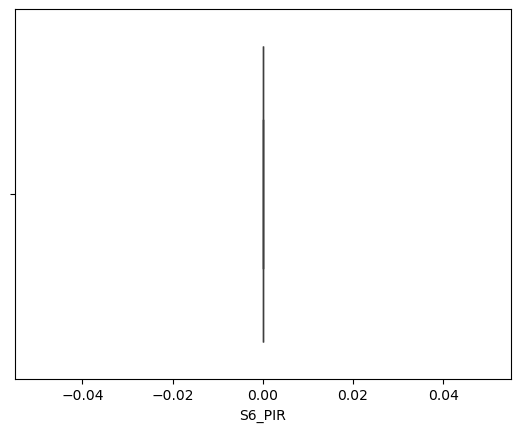

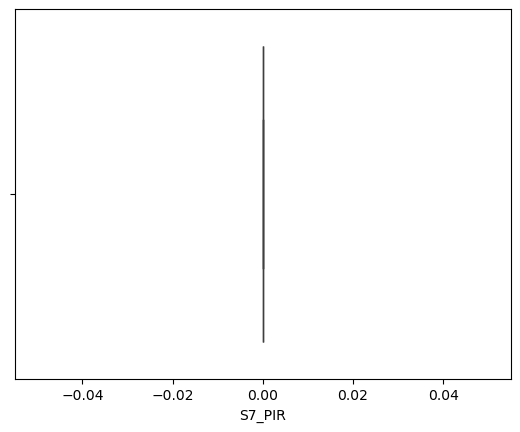

In [37]:
for i in df_for_outlier.columns:
    sns.boxplot(data=df_outlier,x=i)
    plt.show()

In [38]:
# 6) VISUALIZATION FOR MORE INSIGHTS 

In [39]:
# SCATTERPLOT

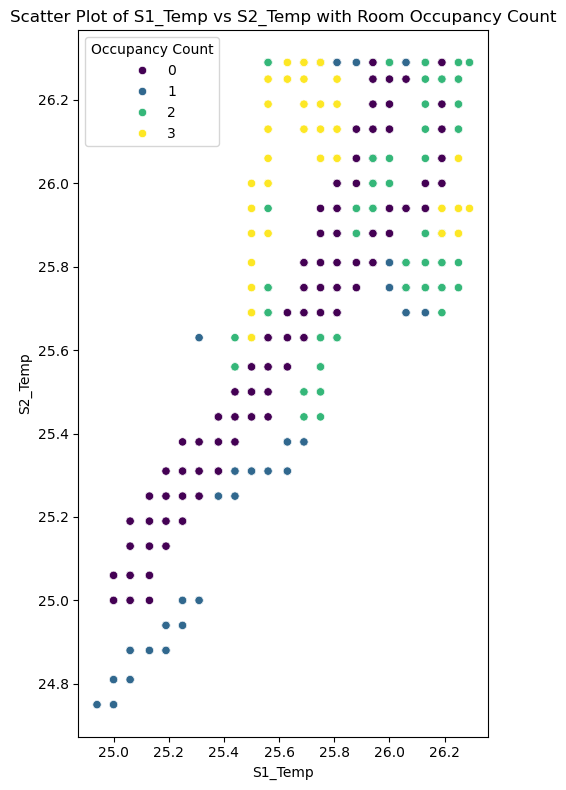

In [40]:
plt.figure(figsize=(5, 8))
sns.scatterplot(data=df_outlier,x=df_outlier['S1_Temp'], y=df_outlier['S2_Temp'],  hue=num_columns['Room_Occupancy_Count'], palette="viridis")
plt.title('Scatter Plot of S1_Temp vs S2_Temp with Room Occupancy Count')
plt.xlabel('S1_Temp')
plt.ylabel('S2_Temp')
plt.legend(title='Occupancy Count')
plt.tight_layout()
plt.show()

In [41]:
# HISTOGRAM

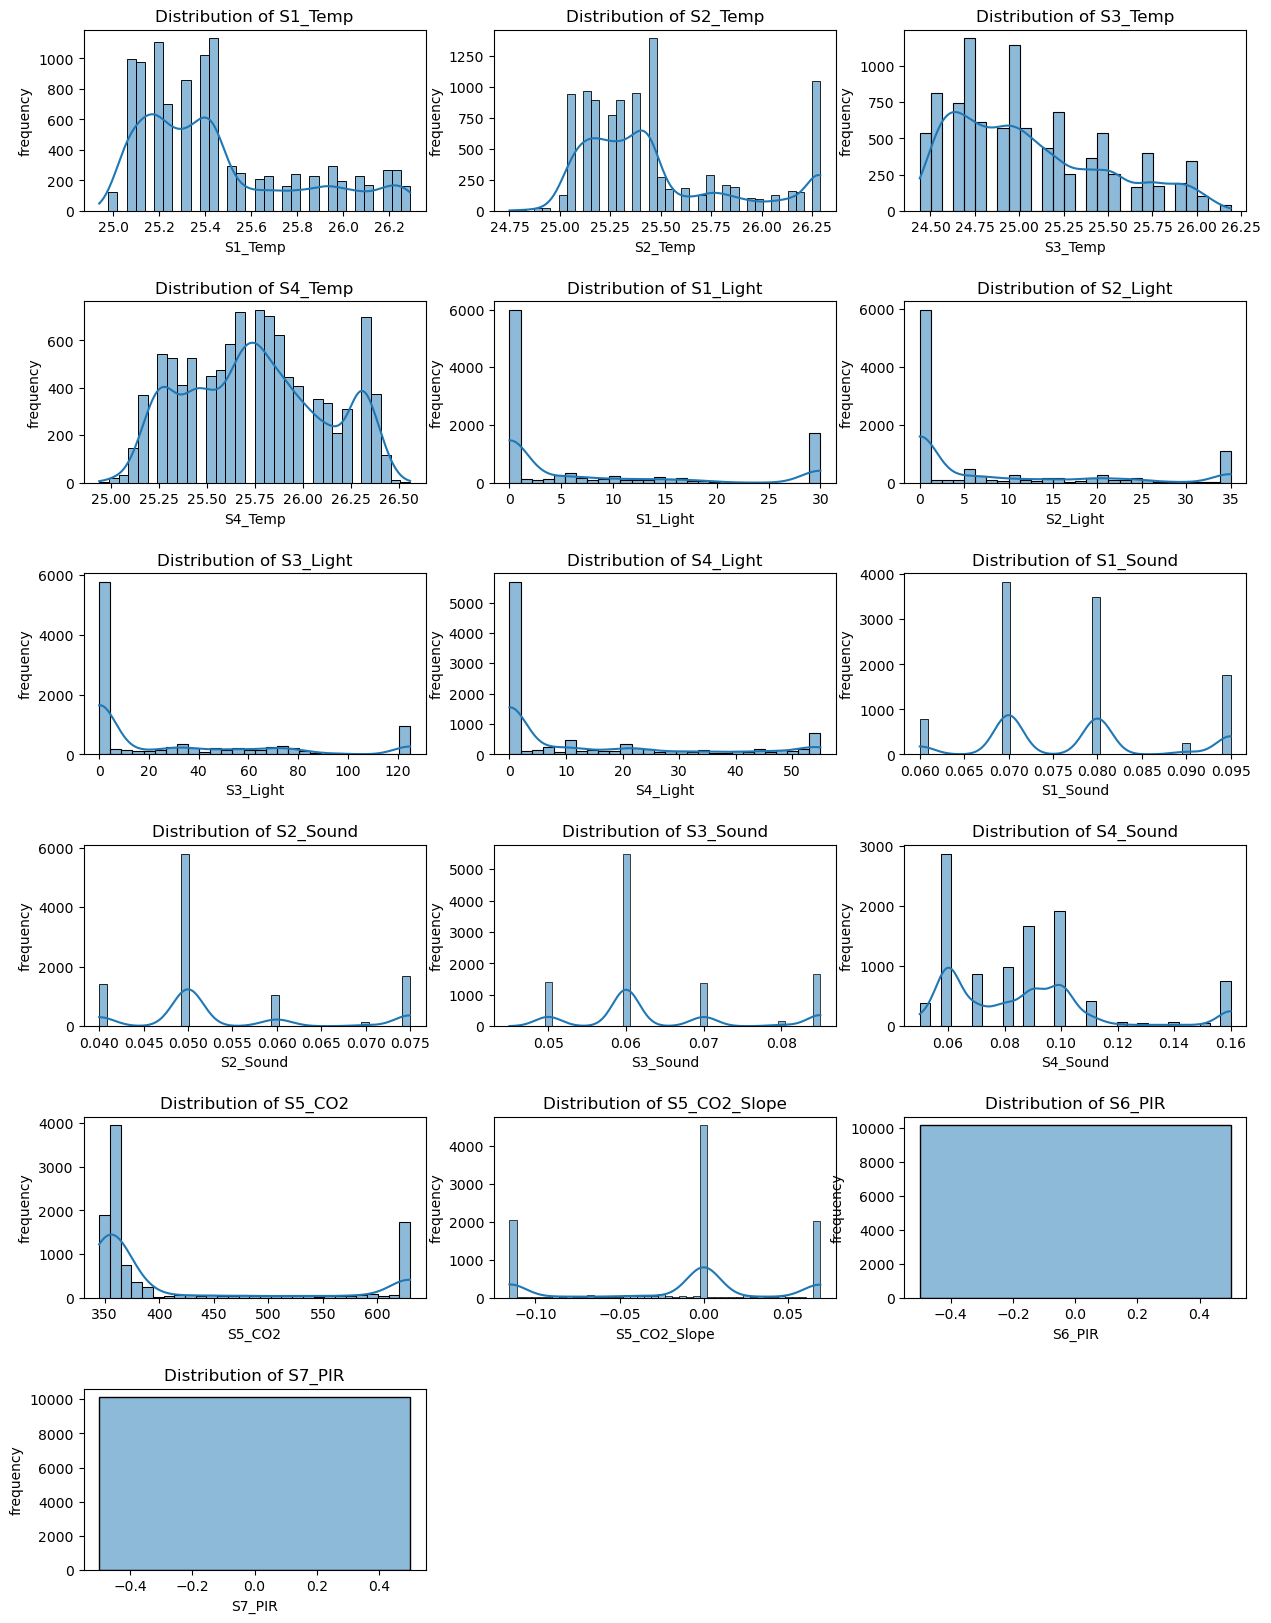

In [42]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(num_columns.drop(columns=['Room_Occupancy_Count']).columns,1):
    plt.subplot((len(num_columns.columns)+2)//3,3,i)
    sns.histplot(data=df_outlier[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
plt.subplots_adjust(hspace=0.5)

In [43]:
# HEAT MAP

<Axes: >

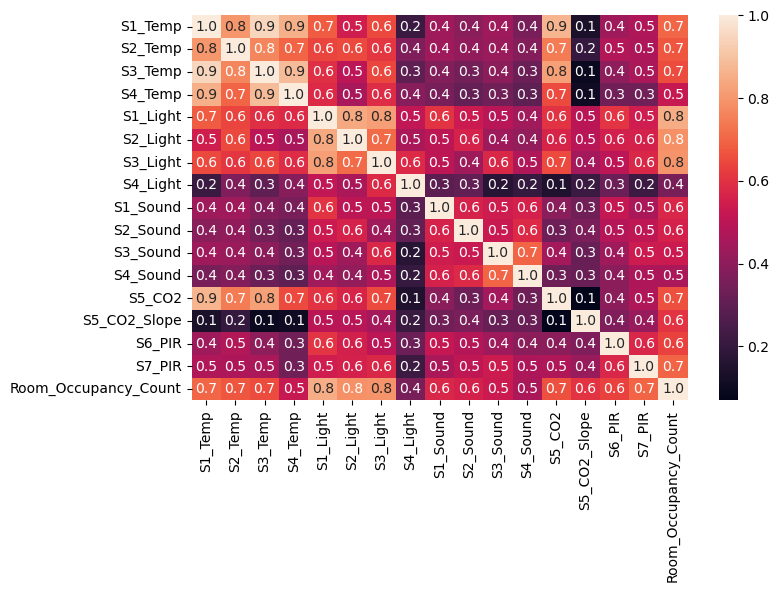

In [44]:
corr=num_columns.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt='.1f',cbar=True)

In [45]:
# BAR CHART

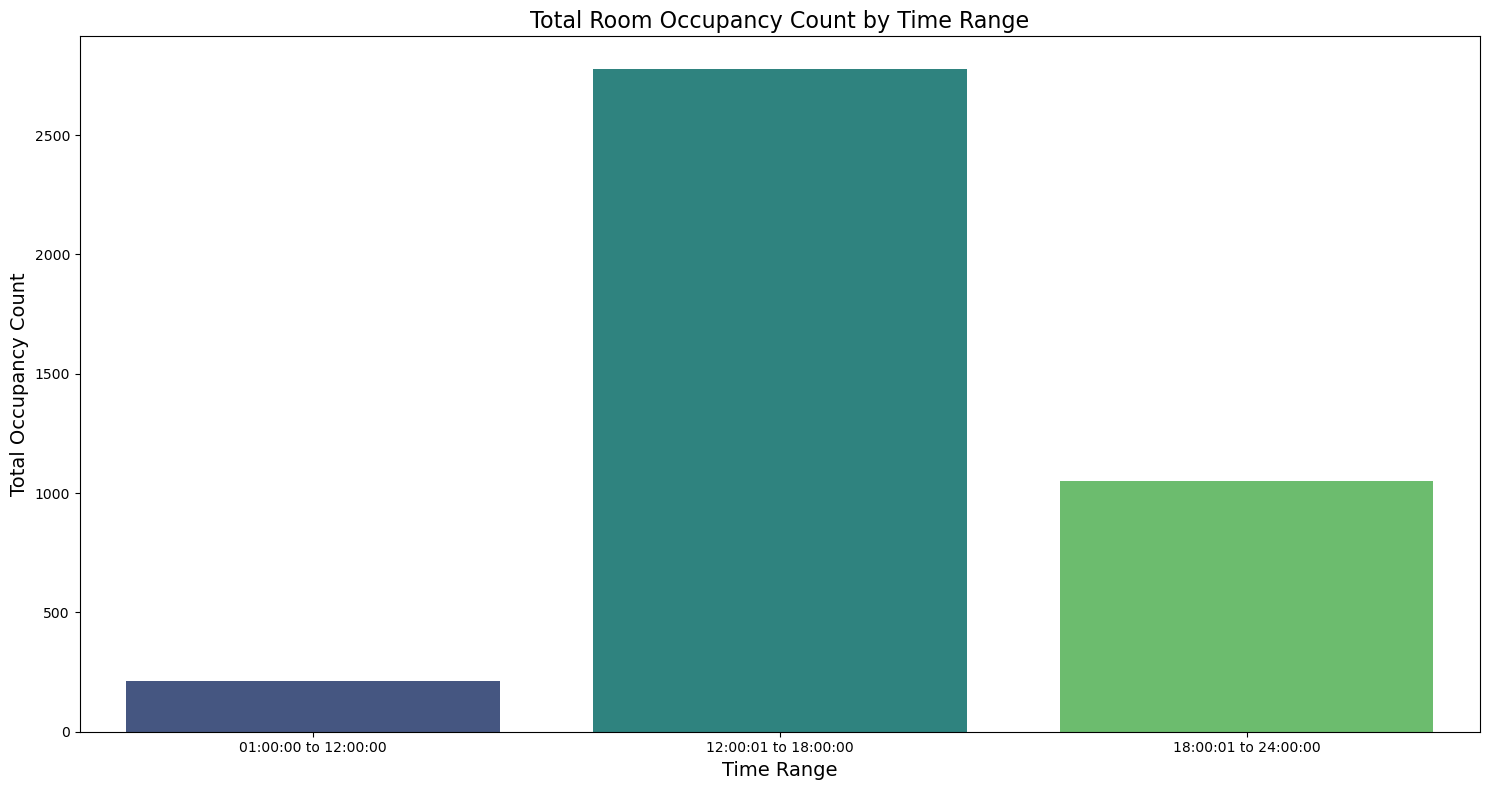

In [46]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Categorize time into ranges
data['Time_range'] = data['Time'].apply(
    lambda time: '01:00:00 to 12:00:00' if time.hour < 12 else
                 '12:00:01 to 18:00:00' if time.hour < 18 else
                 '18:00:01 to 24:00:00')

time_range_avg = data.groupby('Time_range')['Room_Occupancy_Count'].sum().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(y='Room_Occupancy_Count', x='Time_range', data=time_range_avg, palette='viridis')
plt.title('Total Room Occupancy Count by Time Range', fontsize=16)
plt.xlabel('Time Range', fontsize=14)
plt.ylabel('Total Occupancy Count', fontsize=14)
plt.tight_layout()
plt.show()

In [47]:
# Checking Skewness of Data

In [48]:
df_skew= df_outlier.select_dtypes(include= ['int64','float64']).skew()
df_skew

S1_Temp                 0.943261
S2_Temp                 0.991328
S3_Temp                 0.650162
S4_Temp                 0.129630
S1_Light                1.262649
S2_Light                1.330326
S3_Light                1.321765
S4_Light                1.230777
S1_Sound                0.379921
S2_Sound                0.913251
S3_Sound                0.823956
S4_Sound                1.180853
S5_CO2                  1.201290
S5_CO2_Slope           -0.462433
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    2.057635
dtype: float64

In [49]:
num_column_name = df_outlier.select_dtypes(include=['int64', 'float64']).columns
num_column_name = num_column_name.drop('Room_Occupancy_Count') 
num_column_name

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')

In [50]:
target_count= df_outlier['Room_Occupancy_Count'].value_counts()
target_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [51]:
# Using POWERTRANSFORMER to reduce the skewness of data

In [52]:
pwt=PowerTransformer(method='yeo-johnson')

In [53]:
df_outlier[num_column_name]=pwt.fit_transform(df_outlier[num_column_name])

In [54]:
# Checking Skewness After PowerTransformer

In [55]:
df_skew=df_outlier[num_column_name].select_dtypes(include=['int64','float64']).skew()
df_skew

S1_Temp         0.000000
S2_Temp         0.000000
S3_Temp         0.000000
S4_Temp         0.018007
S1_Light        0.444347
S2_Light        0.441039
S3_Light        0.326325
S4_Light        0.340957
S1_Sound        0.038708
S2_Sound        0.099924
S3_Sound        0.095233
S4_Sound        0.141735
S5_CO2          0.000000
S5_CO2_Slope   -0.066119
S6_PIR          0.000000
S7_PIR          0.000000
dtype: float64

In [56]:
target_count= df_outlier['Room_Occupancy_Count'].value_counts()
target_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [57]:
# Normal distribution curve -- BELL CURVE

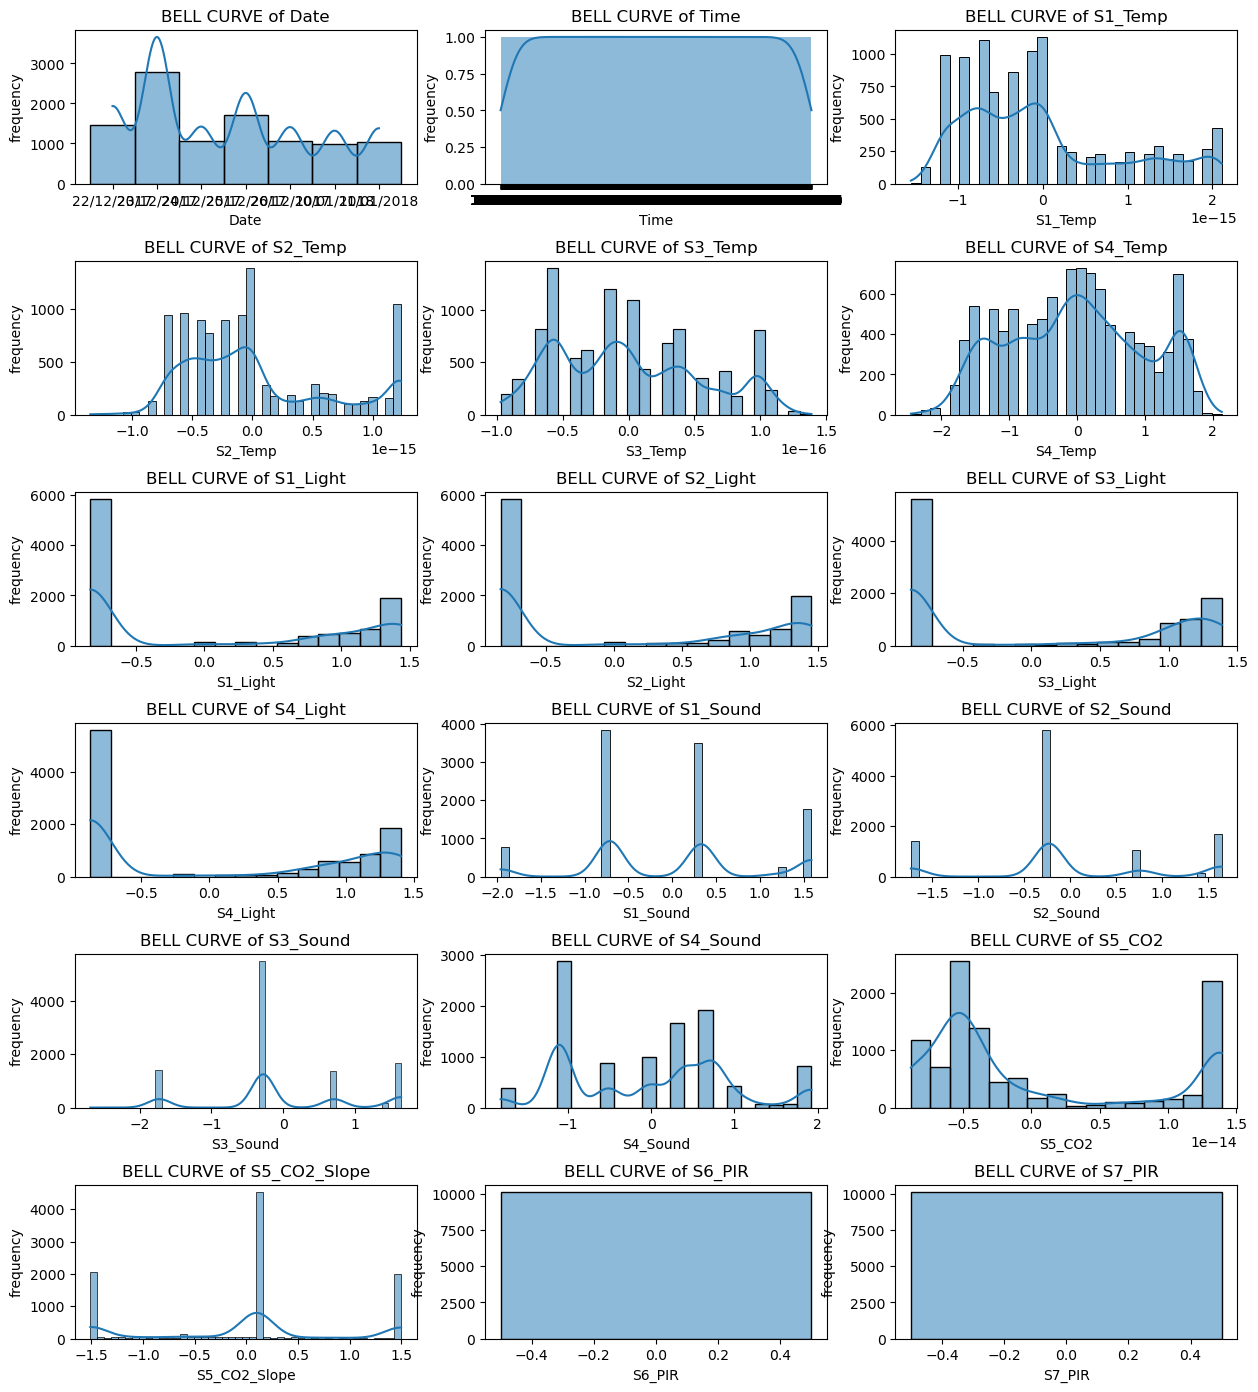

In [58]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df_outlier.drop(columns=['Room_Occupancy_Count'],axis=1).columns,1):
    plt.subplot((len(df_outlier.columns)+2)//3,3,i)
    sns.histplot(data=df_outlier[column],kde=True)
    plt.title(f'BELL CURVE of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
plt.subplots_adjust(hspace=0.5)

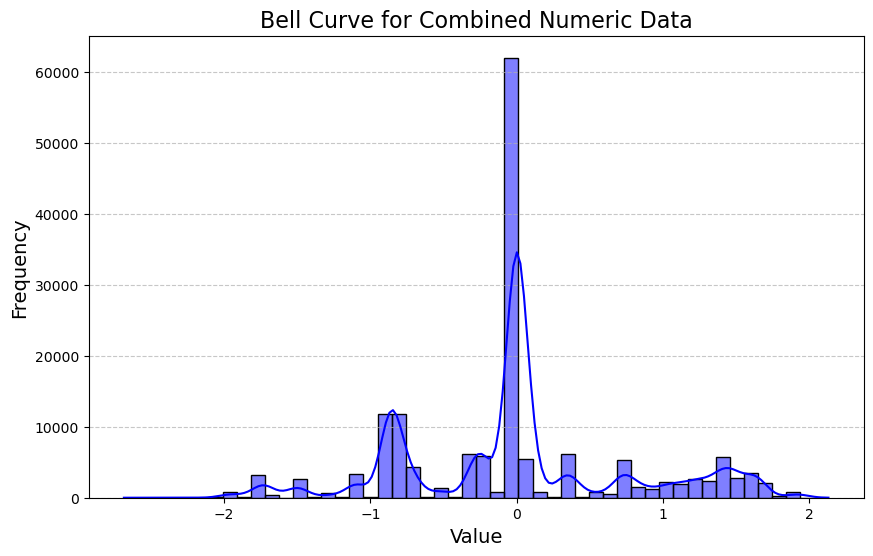

In [59]:
numeric_data = df_outlier.drop('Room_Occupancy_Count', axis=1).select_dtypes(include=['int64', 'float64'])
combined_data = numeric_data.values.flatten()  #combine all the data from multiple columns (or rows) into a single array.
plt.figure(figsize=(10, 6))
sns.histplot(combined_data, kde=True, color='blue', bins=50)
plt.title('Bell Curve for Combined Numeric Data', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
# Feature selection using SelectKBest

In [61]:
X=df_outlier.drop(df_outlier[['Room_Occupancy_Count','Date','Time']],axis=1)
y=df_outlier['Room_Occupancy_Count']

In [62]:
select=SelectKBest(score_func=f_classif)
X_new=select.fit_transform(X,y)

In [63]:
X_selected= X.columns[select.get_support()]
X_selected

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2'],
      dtype='object')

In [64]:
feature_score=pd.DataFrame({'features':X.columns, 'score':select.scores_}).sort_values(by='score',ascending=False)
feature_score

,features,score
0,S1_Temp,3171.483637
9,S2_Sound,2912.114745
1,S2_Temp,2742.825837
8,S1_Sound,2700.465367
4,S1_Light,2661.141865
10,S3_Sound,2633.008970
5,S2_Light,2554.609081
12,S5_CO2,2531.195977
2,S3_Temp,2114.161203
6,S3_Light,1927.258833


In [65]:
selecter= SelectKBest(score_func=f_classif,k=10)
X_features= selecter.fit_transform(X,y)

In [66]:
X_selected= X.columns[selecter.get_support()]
X_selected

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S1_Sound', 'S2_Sound', 'S3_Sound', 'S5_CO2'],
      dtype='object')

In [67]:
# SPLITTING DATA FOR TRAINING AND TESTING

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,test_size=0.2,random_state=42)

In [69]:
X_train.shape

(8103, 10)

In [70]:
X_test.shape

(2026, 10)

In [71]:
y_train.shape

(8103,)

In [72]:
# counting target values

In [73]:
target_count= df['Room_Occupancy_Count'].value_counts()
target_count

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [74]:
# Using SMOTE function for equalizing the targets 
#SMOTE (Synthetic Minority Oversampling Technique)

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote=SMOTE(random_state=42)

In [77]:
X_train_resambled,y_train_resambled=smote.fit_resample(X_train,y_train)

In [78]:
print(X_train_resambled.shape)
print(y_train_resambled.shape)

(26436, 10)
(26436,)


In [79]:
target_sum=y_train_resambled.value_counts()
target_sum

Room_Occupancy_Count
0    6609
3    6609
1    6609
2    6609
Name: count, dtype: int64

In [80]:
# SCALING PROCESS

In [81]:
ss=StandardScaler()

In [82]:
X_train_scaled=ss.fit_transform(X_train_resambled)
X_test_scaled=ss.fit_transform(X_test)

# model building 

In [84]:
# model building 

In [85]:
models={
    'Logistic Regrassion': LogisticRegression(),
    'SVC':SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier()
}



In [86]:
#traning each model and find the evaluation score

In [87]:
results={}
for model_name, model in models.items():
    model.fit(X_train_scaled,y_train_resambled)  #traning each model
    y_pred=model.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)       # evaluation score each model
    classification=classification_report(y_test,y_pred)
    confusion=confusion_matrix(y_test,y_pred)
    results[model_name]={ 'Accuracy Score':accuracy,
                        'Confusion Metrics':confusion,
                        'Classification Report': classification
        
    }


In [88]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {result['Accuracy Score']}")
    print(f"Confusion Metrics:\n{result['Confusion Metrics']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("-" * 50)

Model: Logistic Regrassion
Accuracy Score: 0.6697926949654491
Confusion Metrics:
[[1162  173  194   90]
 [   0    1  102    0]
 [   0    0  164    0]
 [   0    0  110   30]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1619
           1       0.01      0.01      0.01       103
           2       0.29      1.00      0.45       164
           3       0.25      0.21      0.23       140

    accuracy                           0.67      2026
   macro avg       0.39      0.49      0.38      2026
weighted avg       0.84      0.67      0.72      2026

--------------------------------------------------
Model: SVC
Accuracy Score: 0.48124383020730505
Confusion Metrics:
[[817 107 243 452]
 [  0  20  22  61]
 [  0   9   0 155]
 [  0   1   1 138]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1619
           1       0.15      0.19      0.1

# #Hyperparameter Tuning

In [90]:
# Hyperparameters For imporving evaluation score

In [91]:
from sklearn.model_selection import GridSearchCV
logistic_model=LogisticRegression()

In [92]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization
    'C': [0.01, 0.1, 1, 10, 100],                 # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],     # Optimization algorithm
    'max_iter': [100, 500, 1000]                  # Number of iterations
}

In [93]:
# Initialize and Fit the Model

In [94]:
grid_search = GridSearchCV(estimator=logistic_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Metric to optimize
                           cv=5,                # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1) 
grid_search.fit(X_train_scaled, y_train_resambled)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [95]:
#Inspect the Results

In [96]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9245347821720105


In [97]:
# Extract the best model from grid search 

In [98]:
best_model = grid_search.best_estimator_

In [99]:
# Make predictions on the test data

In [100]:
y_pred = best_model.predict(X_test_scaled)

In [101]:
# find the evaluation score

In [102]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("\nTest Data Evaluation:")
print(f"Accuracy Score: {accuracy}")
print(f"Confusion Metrics:\n{confusion}")
print(f"Classification Report:\n{classification}")


Test Data Evaluation:
Accuracy Score: 0.6999012833168805
Confusion Metrics:
[[1188  293   64   74]
 [   0   64   39    0]
 [   0    6  158    0]
 [   0    0  132    8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85      1619
           1       0.18      0.62      0.27       103
           2       0.40      0.96      0.57       164
           3       0.10      0.06      0.07       140

    accuracy                           0.70      2026
   macro avg       0.42      0.59      0.44      2026
weighted avg       0.85      0.70      0.74      2026



# Creating a Pipeline

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
from sklearn.impute import SimpleImputer

In [106]:
pipeline= Pipeline([('imputer',SimpleImputer(strategy='mean')),
    ('transformer',PowerTransformer(method='yeo-johnson')),
    ('scaler',StandardScaler()),
    ('model',best_model)])

In [107]:
pipeline.fit(X_train_scaled,y_train_resambled)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('transformer', PowerTransformer()),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [108]:
# CHECKING ACCURACY OF PIPELINE PREDICTION 

In [109]:
y_pred_pipe=pipeline.predict(X_test_scaled)

In [110]:
accuracy = accuracy_score(y_test, y_pred_pipe)
accuracy

0.6697926949654491

# Save the Model

In [112]:
joblib.dump(pipeline,'predicted_project_pipline.joblib')

['predicted_project_pipline.joblib']

In [113]:
load_pipline=joblib.load('predicted_project_pipline.joblib')

# Test with Unseen Data

In [115]:
Data_new2=pd.read_csv("C:\\Users\\josep\\OneDrive\\Desktop\\data\\smart building management or HVAC control\\project test data pipeline.csv")

In [116]:
df_new2=pd.DataFrame(Data_new2)
df_new2.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2,Room_Occupancy_Count
0,24.94,24.75,24.56,121,34,53,0.08,0.19,0.06,390,1
1,24.94,24.75,24.56,121,33,53,0.93,0.05,0.06,390,1
2,25.00,24.75,24.50,121,34,53,0.43,0.11,0.08,390,1
3,25.00,24.75,24.56,121,34,53,0.41,0.10,0.10,390,1
4,25.00,24.75,24.56,121,34,54,0.18,0.06,0.06,390,1


In [117]:
df2_for_predict=df_new2.drop('Room_Occupancy_Count',axis=1)
df2_for_predict.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2
0,24.94,24.75,24.56,121,34,53,0.08,0.19,0.06,390
1,24.94,24.75,24.56,121,33,53,0.93,0.05,0.06,390
2,25.00,24.75,24.50,121,34,53,0.43,0.11,0.08,390
3,25.00,24.75,24.56,121,34,53,0.41,0.10,0.10,390
4,25.00,24.75,24.56,121,34,54,0.18,0.06,0.06,390


In [118]:
unseen_predicted=load_pipline.predict(df2_for_predict)

In [119]:
df_new2['predicted_value']=unseen_predicted

In [120]:
df_new2

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S5_CO2,Room_Occupancy_Count,predicted_value
0,24.94,24.75,24.56,121,34,53,0.08,0.19,0.06,390,1,1
1,24.94,24.75,24.56,121,33,53,0.93,0.05,0.06,390,1,1
2,25.00,24.75,24.50,121,34,53,0.43,0.11,0.08,390,1,1
3,25.00,24.75,24.56,121,34,53,0.41,0.10,0.10,390,1,1
4,25.00,24.75,24.56,121,34,54,0.18,0.06,0.06,390,1,1
5,25.00,24.81,24.56,121,34,54,0.13,0.06,0.06,390,1,1
6,25.00,24.75,24.56,120,34,54,1.39,0.32,0.43,390,1,1
7,25.00,24.81,24.56,121,34,54,0.09,0.06,0.09,390,1,1
8,25.00,24.81,24.56,122,35,56,0.09,0.05,0.06,390,1,1
9,25.00,24.81,24.56,101,34,57,3.84,0.64,0.48,390,1,1


In [121]:
# save data to csv file with predicted results

In [122]:
df_new2.to_csv('unseen_predicted_value2.csv')

# Interpretation of Results 

In [124]:
conf_mat2=confusion_matrix(df_new2['Room_Occupancy_Count'],df_new2['predicted_value'])

Text(0.5, 25.722222222222214, 'predicted label')

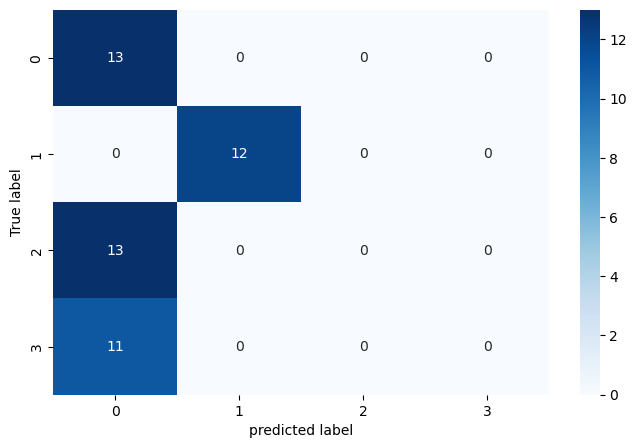

In [125]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_mat2,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('predicted label')

In [126]:
# The model's performance is not satisfactory, so I am going to use a different method to improve the model for better prediction of unseen data.